## Variable distributions

In [1]:
addpath('/data/drive/DPhil/THESIS/Cross_study_analyses/learning-repo/scripts')
clear all
% load all data sets!
comp='onx';ca=1; pX_analysis_init;


% filter the data
% specify what data to EXCLUDE (this should be a json structure, but
% matlab...
pX_subject_filter;
[dt_used] = pX_filter_data(sp, 'pX', 1);

%% all collected data without any exclusions for 
sp = { 
        {{'study', 'visit'}, {[2], [2,3]}},

        };
[dt_coll] = pX_filter_data(sp, 'pX', 0);
cs =[27 153 139; 45 48 71; 232 72 85; 26 200 237]./255;
err_var = 'err_true_p3';
cols =pX_load_colors('acqext4', 'pX');


ans =

    '9.6.0.1099231 (R2019a) Update 1'

Running with visit 1 from Losartan!
Raw participants: 116
Excluded for missing anxiety scores:
    'ss11'
    'ss31'

Participans after anx exlc.: 114
Excluded for failure to distinguish harm from safe:
    'f27'
    'm01'
    'm06'
    'm29'
    'm39'
    'pl16'
    'pl20'
    'ss18'
    'ss19'
    'ss7'

Participans after dist exlc.: 104
   pl9 ... excluding for misunderstanding the task
   ss8_bl7525 ... excluding for missing more than 50% of data
   ss4_bl6040 ... excluding for missing more than 50% of data
   m01_v1 ... excluding for missing more than 50% of data
   m13_v1 ... excluding for missing more than 50% of data
   f39_v1 ... excluding for missing more than 50% of data
   f38_v1 ... excluding for missing more than 50% of data
Participans after all exlc.: 98


### Trait anxiety
#### Overall


ans =

   38.5000


ans =

    39


H =

  logical

   0


P =

    1.0000


KSSTAT =

    0.0315



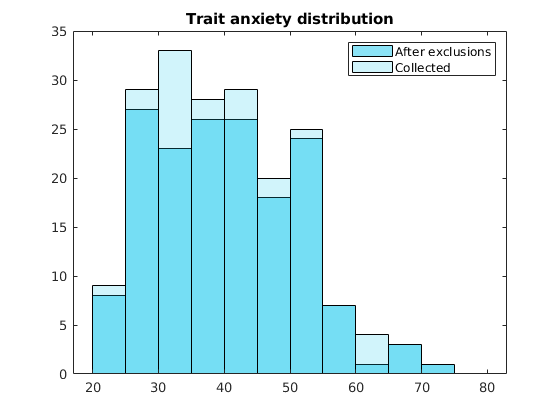

In [2]:
f=figure;
edges = 20:5:80; 
h=histogram(dt_used.ta, edges); hold on
h.FaceAlpha= 0.5;
h.FaceColor=cs(4,:);
h=histogram(dt_coll.ta, edges);  
h.FaceAlpha= 0.2;
h.FaceColor=cs(4,:);
legend({ 'After exclusions', 'Collected'});
title({'Trait anxiety distribution'});
nanmedian(dt_coll.ta)
nanmedian(dt_used.ta)
% Test the null hypothesis that data in vectors x1 and x2 comes from populations with the same distribution.
% The returned value of h = 1 indicates that kstest rejects the null hypothesis at the default 5% significance level.
% h=1 the distributions are different. 

[H,P,KSSTAT] = kstest2(dt_coll.ta,dt_used.ta)

#### By study

Study 1

H =

  logical

   0


P =

    1.0000


KSSTAT =

    0.0617

Study 2

H =

  logical

   0


P =

    0.9965


KSSTAT =

    0.0884

Study 3

H =

  logical

   0


P =

    0.9999


KSSTAT =

    0.0443

=====MAIN MODEL=====

mm = 


Linear mixed-effects model fit by ML

Model information:
    Number of observations             164
    Fixed effects coefficients           3
    Random effects coefficients         98
    Covariance parameters                2

Formula:
    ta ~ 1 + study_str + (1 | ids)

Model fit statistics:
    AIC        BIC        LogLikelihood    Deviance
    -431.94    -416.44    220.97           -441.94 

Fixed effects coefficients (95% CIs):
    Name                      Estimate    SE        tStat     DF     pValue    
    '(Intercept)'             34.944      1.3133    26.608    161    7.9636e-61
    'study_str_study1'        5.5379      1.9856    2.7891    161      0.005923
    'study_str_study3'         5.762      1.8844    3.0577    161     0.00

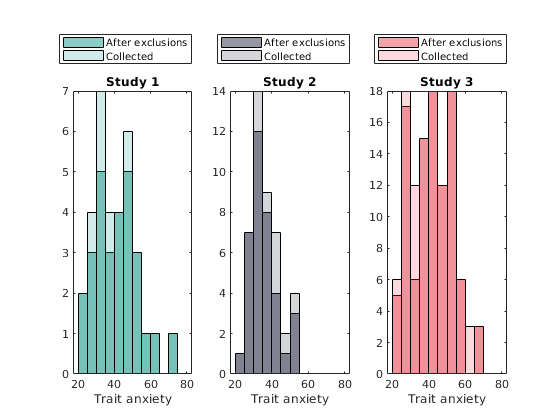

In [3]:

f=figure;
for st = 1:3
    subplot(1,3,st)
    edges = 20:5:80; 
    h=histogram(dt_used.ta(dt_used.study==st), edges);  hold on
    h.FaceAlpha= 0.5;
    h.FaceColor=cs(st,:);
    h=histogram(dt_coll.ta(dt_coll.study==st), edges); 
    h.FaceAlpha= 0.2;
    h.FaceColor=cs(st,:);
    
    
    legend({ 'After exclusions', 'Collected'}, 'location', 'northoutside');
    title({['Study ' num2str(st)]});
    xlabel('Trait anxiety');
    disp(['Study ' num2str(st)])
    [H,P,KSSTAT] = kstest2(dt_coll.ta(dt_coll.study==st),dt_used.ta(dt_used.study==st))
end
f.Position(3) = 700;
f.Position(4)=250;
cf= []; 
cf.bycat=0;
cf.cat ={'study_str'};
[m] = pX_report_stats( (dt_used), 'ta', {'study_str'}, {'ids'}, cf);

### Shock intensity
(all in mA)
#### Overall


ans =

   280


ans =

  289.5000


H =

  logical

   0


P =

     1


KSSTAT =

    0.0186



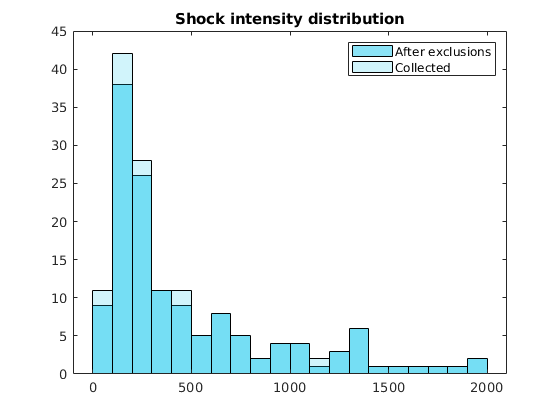

In [4]:
f=figure;
edges = 0:100:2000; 
h=histogram(dt_used.sh_int, edges); hold on
h.FaceAlpha= 0.5;
h.FaceColor=cs(4,:);
h=histogram(dt_coll.sh_int, edges);  
h.FaceAlpha= 0.2;
h.FaceColor=cs(4,:);
legend({ 'After exclusions', 'Collected'});
title({'Shock intensity distribution'});
nanmedian(dt_coll.sh_int)
nanmedian(dt_used.sh_int)
[H,P,KSSTAT] = kstest2(dt_coll.sh_int,dt_used.sh_int)

#### By study and anxiety


H =

  logical

   0


P =

    1.0000


KSSTAT =

    0.0571


H =

  logical

   0


P =

    1.0000


KSSTAT =

    0.0558


H =

  logical

   0


P =

    1.0000


KSSTAT =

    0.0255

=====MAIN MODEL=====

mm = 


Linear mixed-effects model fit by ML

Model information:
    Number of observations             143
    Fixed effects coefficients           6
    Random effects coefficients         90
    Covariance parameters                2

Formula:
    sh_int ~ 1 + study_str*ta + (1 | ids)

Model fit statistics:
    AIC       BIC       LogLikelihood    Deviance
    2206.8    2230.5    -1095.4          2190.8  

Fixed effects coefficients (95% CIs):
    Name                         Estimate    SE        tStat       DF 
    '(Intercept)'                 705.58     498.18      1.4163    137
    'study_str_study1'            125.04     635.34     0.19681    137
    'study_str_study3'           -667.18     617.09     -1.0812    137
    'ta'                         -4.4899     13.929

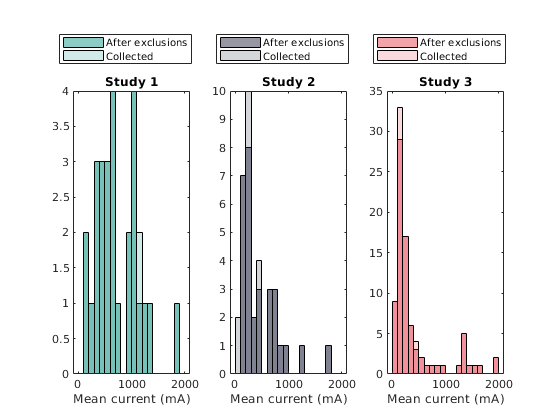

In [5]:
f=figure;
for st = 1:3
    subplot(1,3,st)

    h=histogram(dt_used.sh_int(dt_used.study==st), edges);  hold on
    h.FaceAlpha= 0.5;
    h.FaceColor=cs(st,:);
    h=histogram(dt_coll.sh_int(dt_coll.study==st), edges); 
    h.FaceAlpha= 0.2;
    h.FaceColor=cs(st,:);
    
    
    legend({ 'After exclusions', 'Collected'}, 'location', 'northoutside');
    title({['Study ' num2str(st)]});
    xlabel('Mean current (mA)');
    [H,P,KSSTAT] = kstest2(dt_coll.sh_int(dt_coll.study==st),dt_used.sh_int(dt_used.study==st))
end
f.Position(3) = 700;
f.Position(4)=250;
cf= []; 
cf.bycat=1;
cf.cat ={'study_str'};
[m] = pX_report_stats( (dt_used), 'sh_int', {'study_str', 'ta'}, {'ids'}, cf);

Running with visit 1 from Losartan!
Raw participants: 116
Excluded for missing anxiety scores:
    'ss11'
    'ss31'

Participans after anx exlc.: 114
Excluded for failure to distinguish harm from safe:
    'f27'
    'm01'
    'm06'
    'm29'
    'm39'
    'pl16'
    'pl20'
    'ss18'
    'ss19'
    'ss7'

Participans after dist exlc.: 104
   pl9 ... excluding for misunderstanding the task
   ss8_bl7525 ... excluding for missing more than 50% of data
   ss4_bl6040 ... excluding for missing more than 50% of data
   m01_v1 ... excluding for missing more than 50% of data
   m13_v1 ... excluding for missing more than 50% of data
   f39_v1 ... excluding for missing more than 50% of data
   f38_v1 ... excluding for missing more than 50% of data
Participans after all exlc.: 98

ans =

    0.2531


ans =

    0.0538


ans =

    0.2668



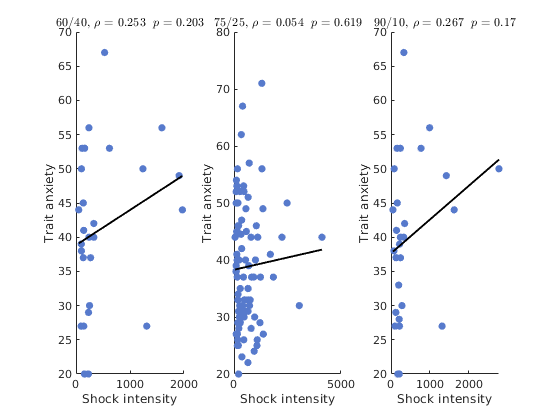

In [6]:

f=figure;
pX_subject_filter;
[dt_used] = pX_filter_data(sp, 'pX', 1);


blocks={'60/40', '75/25', '90/10'};
for b = 1:numel(blocks)
 
        subplot(1,3,b);
        ta=[];ta = dt_used.ta(ismember(dt_used.contingency, blocks{b}));
        sh=[];sh = (dt_used.sh_int(find_str_in_cell_exact(dt_used.contingency, blocks{b})));
        idx=[];idx= isnan(ta) | isnan(sh);
        ta(idx) =[];
        sh(idx) =[];
        
        scatter(sh, ta, 30, 'MarkerFaceColor', [0.34 0.48 0.80], 'MarkerEdgeColor','none');
        plot_linear_fit(sh, ta, [0 0 0], 1.4);
        add_correlation(sh, ta, [blocks{b} ', '])    
        %xlim([-0.1 0.8])
        xlabel('Shock intensity');
        ylabel('Trait anxiety');
 
end
f.Position(3) = 800;
f.Position(4) =300;

#### By probability data

Running with visit 1 from Losartan!
Raw participants: 116
Excluded for missing anxiety scores:
    'ss11'
    'ss31'

Participans after anx exlc.: 114
Excluded for failure to distinguish harm from safe:
    'f27'
    'm01'
    'm06'
    'm29'
    'm39'
    'pl16'
    'pl20'
    'ss18'
    'ss19'
    'ss7'

Participans after dist exlc.: 104
   pl9 ... excluding for misunderstanding the task
   ss8_bl7525 ... excluding for missing more than 50% of data
   ss4_bl6040 ... excluding for missing more than 50% of data
   m01_v1 ... excluding for missing more than 50% of data
   m13_v1 ... excluding for missing more than 50% of data
   f39_v1 ... excluding for missing more than 50% of data
   f38_v1 ... excluding for missing more than 50% of data
Participans after all exlc.: 98
Loading pre-computed data structure
=====MAIN MODEL=====

mm = 


Linear mixed-effects model fit by ML

Model information:
    Number of observations             286
    Fixed effects coefficients          12
    Random

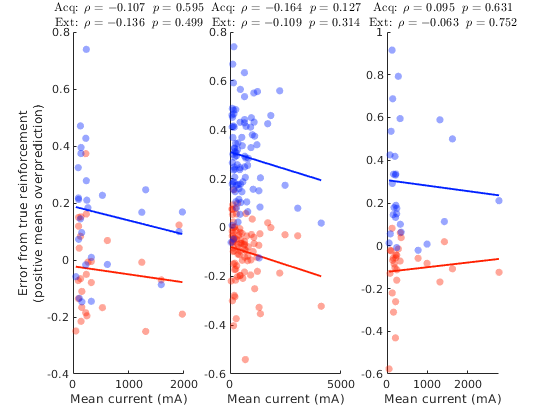

In [7]:
pX_subject_filter;

[SData] = pX_filter_data(sp, 'pX', 1);
subIDs = cellstr(SData.specID);

data = pX_build_dataset(subIDs, SData, 'real_data',1);

dloc = data(find(data.phase~=0 & data.Trial_Type==3),:);
[GS, Gkey, S, Skey, mle] = pX_get_stats(dloc, dloc.(err_var), {'phase', 'sh_int', 'contingency'});
f=figure;
phstr = {'Acq', 'Ext'};
for b = 1:3
    subplot(1,3,b)
    
    tstr = {};
    for ph = 1:2
            d = S(find(ismember(Skey.contingency, blocks{b}) & ismember(Skey.phase, ph)));
        ta=[]; ta= Skey.sh_int(ismember(Skey.contingency, blocks{b}) & ismember(Skey.phase, ph));
        %t=gca; t.XTick = [1 2]; t.XTickLabel = cuestr;
        scatter(ta, d, 30, 'MarkerFaceColor', cols(ph*2,:), 'MarkerEdgeColor','none', 'MarkerFaceAlpha',0.4);
        plot_linear_fit(ta,d, cols(ph*2,:), 1.4);
        [R,P] = corr(ta,d, 'type','Pearson');
        tstr{ph} = [phstr{ph} ': $\rho=' num2str(round(R,3)) '\hspace{0.2cm} p=' num2str(round(P,3))   '$'];
    end
    t=title(tstr, "Interpreter","latex");
    if b==1
        ylabel({'Error from true reinforcement', '(positive means overprediction)'});
    end
    xlabel('Mean current (mA)')
end

f.Position(3) =800;
f.Position(4) =280;

dloc = data(find(data.phase~=0 & data.Trial_Type==3),:);
cf= []; 
cf.bycat=1;
cf.cat ={'contingency'};
[m] = pX_report_stats(dloc, err_var, {'phase_str', 'sh_int', 'contingency'}, {'specID', 'study'}, cf);